In [14]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import scipy.signal
from scipy.fftpack import fft, fftshift,fftfreq
import pandas as pd


<class 'numpy.int16'>


<ipython-input-15-18185686395e>:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal = np.fromstring(signal, "Int16")
<ipython-input-15-18185686395e>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, "Int16")


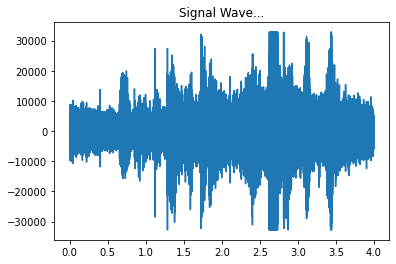

[  477 -3165  3632 ...  4005 -5102  2767]
[   nan    nan    nan ...  251.3 -364.  -212.6]


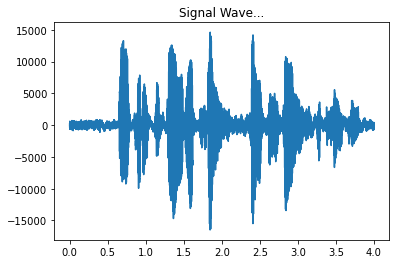

In [15]:
spf = wave.open("test_noise.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")
fs = spf.getframerate()

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(signal) / fs, num=len(signal))
print(type(signal[0]))
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()

data=pd.DataFrame(signal,columns=["input"])
###window size
n=10
output=data["input"].rolling(n).mean()
print(signal)
print(output.values)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, output.values)
plt.show()


<ipython-input-4-5ae6943cea5d>:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  signal = np.fromstring(signal, "Int16")
<ipython-input-4-5ae6943cea5d>:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, "Int16")


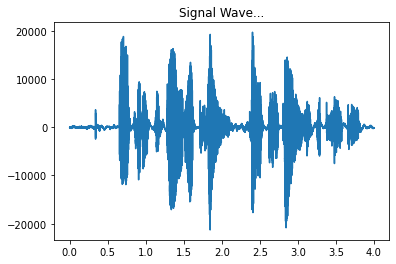

In [4]:
spf = wave.open("test.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")
fs = spf.getframerate()

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()


/home/saksham/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


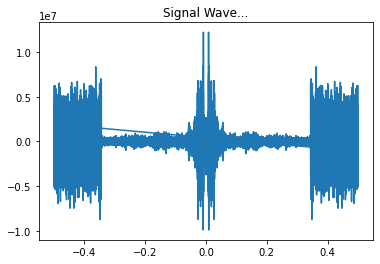

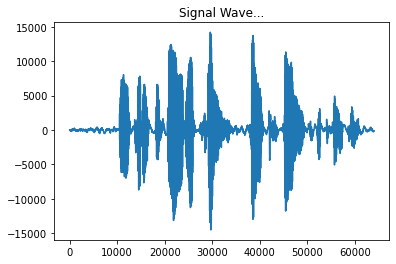

In [16]:
### transform to frequency signal
freq=fft(signal)
xf=fftfreq(len(signal))
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(xf,freq)
plt.show()
sampling_freq=fs
order=5
cutoff_freq=500
normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)
filtered_signal = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, signal)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(filtered_signal)
plt.show()

In [ ]:
###spectral subtraction
